Approximated solutions
x: -5.00000000000000 -- y: -0.643713883694190
x: -4.85477844299463 -- y: -0.158180368638937
x: -4.78374683362683 -- y: -0.0395671705336891
x: -4.74817057588362 -- y: -0.00991592476984799


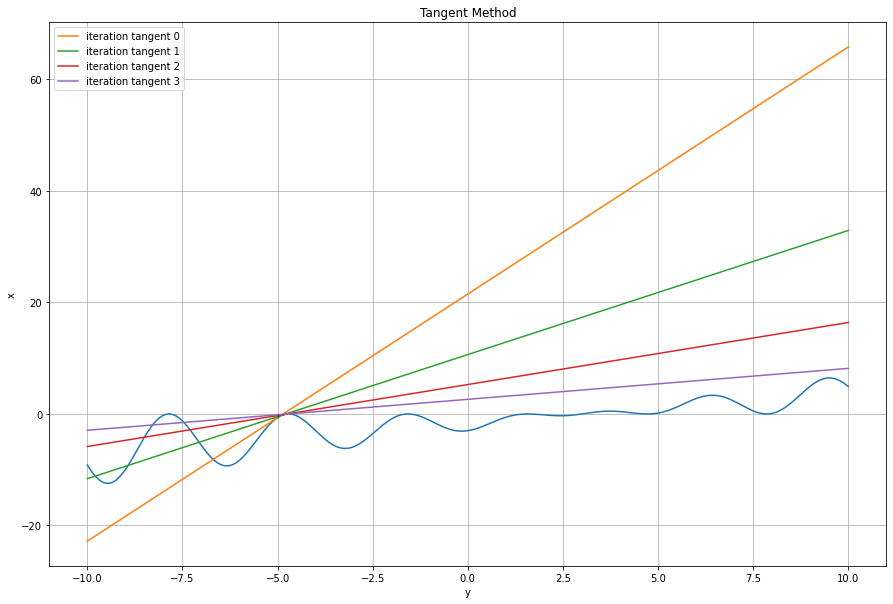

In [15]:
import matplotlib.pyplot as plt
from sympy import *
import numpy as np

def apply_newton_method(x_coord):
    x1 = x_coord - (y.subs(x, x_coord)/y_diff.subs(x, x_coord))
    y1 = y.subs(x, x1)
    return [x1,y1]

def iterate_over_x0(n, x0):
    if n==0:
        return
    else:
        n-=1
        x, y = apply_newton_method(x0)
        global tangency_points
        tangency_points.append([x, y])
        iterate_over_x0(n, x)
        
def line_eq(t, m, x, y0):
    return y0 + m*(t-x)
        
def tangents_eq():
    global tangency_points_eval
    global m_coeffs
    t = np.linspace(-10, 10, 1000)
    start = True
    y_tangents = None
    
    for xy, m in zip(tangency_points_eval, m_coeffs):
        f = lambda t: line_eq(t, m, xy[0], xy[1])
        f = np.vectorize(f)
        if(start):
            y_tangents = np.array([f(t)])
            start = False
        else:
            y_tangents = np.concatenate((y_tangents, [f(t)]))
    return y_tangents


# point over which newton's method is applied
x0 = -5

# number of iterations
n = 3

# function
x = Symbol('x')
"""
funzioni d'esempio
x**2 - 2*x -3
(x-3)*(cos(x))**2

"""
y = (x-3)*(cos(x))**2

y_diff = y.diff(x)
tangency_points = [[x0, y.subs(x, x0)]]

# x_n+1 = x_n - f(x_n)/f'(x_n) applied n-times, with x0 as starting point
iterate_over_x0(n, x0)

# convert approximations from symbolic to numeric
tangency_points_eval = [[N(t) for t in xy] for xy in tangency_points]

# construct tangent lines - m coefficients from derivatives in x_n
m_coeffs = [N(y_diff.subs(x, x_n)) for x_n in list(zip(*tangency_points))[0]]
tangents = tangents_eq()

# plotting

x = np.linspace(-10, 10, 1000)
y = (x-3)*(np.cos(x))**2

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_ylabel("x")
ax.set_xlabel("y")
ax.set_title("Tangent Method")
plt.grid()

ax.plot(x,y)

j=0
for line in tangents:
    ax.plot(x, line, label="iteration tangent " + str(j))
    j+=1

print("Approximated solutions")
for x, y in tangency_points_eval:
    ax.plot([x, x], [y, 0], '--', color="black", alpha=0.5, lw=1.2)
    print(f"x: {x} -- y: {y}")

plt.autoscale()
ax.legend()
plt.show()